# p.375

# RNN이 성능이 썩 뛰어나진 않음.
* 시계열을 처리할 수 있다.
- 장기 의존성의 한계(오래된 정보를 기억할 수 없다)

In [3]:
import numpy as np

size, seq_len = 100, 3
X = np.empty(shape=(size, seq_len, 1)) # 1 스텝에 스칼라 1개
Y = np.empty(shape=(size,))

for i in range(size):
    c = np.linspace(i/10, (i+seq_len-1)/10, seq_len)
    X[i] = c[:, np.newaxis]
    Y[i] = (i+seq_len)/10

for i in range(len(X)):
    print(X[i], Y[i])

[[0. ]
 [0.1]
 [0.2]] 0.3
[[0.1]
 [0.2]
 [0.3]] 0.4
[[0.2]
 [0.3]
 [0.4]] 0.5
[[0.3]
 [0.4]
 [0.5]] 0.6
[[0.4]
 [0.5]
 [0.6]] 0.7
[[0.5]
 [0.6]
 [0.7]] 0.8
[[0.6]
 [0.7]
 [0.8]] 0.9
[[0.7]
 [0.8]
 [0.9]] 1.0
[[0.8]
 [0.9]
 [1. ]] 1.1
[[0.9]
 [1. ]
 [1.1]] 1.2
[[1. ]
 [1.1]
 [1.2]] 1.3
[[1.1]
 [1.2]
 [1.3]] 1.4
[[1.2]
 [1.3]
 [1.4]] 1.5
[[1.3]
 [1.4]
 [1.5]] 1.6
[[1.4]
 [1.5]
 [1.6]] 1.7
[[1.5]
 [1.6]
 [1.7]] 1.8
[[1.6]
 [1.7]
 [1.8]] 1.9
[[1.7]
 [1.8]
 [1.9]] 2.0
[[1.8]
 [1.9]
 [2. ]] 2.1
[[1.9]
 [2. ]
 [2.1]] 2.2
[[2. ]
 [2.1]
 [2.2]] 2.3
[[2.1]
 [2.2]
 [2.3]] 2.4
[[2.2]
 [2.3]
 [2.4]] 2.5
[[2.3]
 [2.4]
 [2.5]] 2.6
[[2.4]
 [2.5]
 [2.6]] 2.7
[[2.5]
 [2.6]
 [2.7]] 2.8
[[2.6]
 [2.7]
 [2.8]] 2.9
[[2.7]
 [2.8]
 [2.9]] 3.0
[[2.8]
 [2.9]
 [3. ]] 3.1
[[2.9]
 [3. ]
 [3.1]] 3.2
[[3. ]
 [3.1]
 [3.2]] 3.3
[[3.1]
 [3.2]
 [3.3]] 3.4
[[3.2]
 [3.3]
 [3.4]] 3.5
[[3.3]
 [3.4]
 [3.5]] 3.6
[[3.4]
 [3.5]
 [3.6]] 3.7
[[3.5]
 [3.6]
 [3.7]] 3.8
[[3.6]
 [3.7]
 [3.8]] 3.9
[[3.7]
 [3.8]
 [3.9]] 4.0
[[3.8]
 [3.9

* return_sequences=False 하면 마지막 시퀀스의 출력만 나옴
* 회귀는 linear, 분류는 sigmoid, 다중분류는 softmax


In [5]:
import tensorflow as tf

inputs = tf.keras.layers.Input(shape=(seq_len, 1))
# default activation = tanh
x = tf.keras.layers.SimpleRNN(units=20, return_sequences=False)(inputs)
# 회귀는 linear, 분류는 sigmoid, 다중분류는 softmax
outputs = tf.keras.layers.Dense(1)(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3, 1)]            0         
                                                                 
 simple_rnn (SimpleRNN)      (None, 20)                440       
                                                                 
 dense (Dense)               (None, 1)                 21        
                                                                 
Total params: 461
Trainable params: 461
Non-trainable params: 0
_________________________________________________________________


Epoch 1/300
4/4 [==============================] - 2s 3ms/step - loss: 42.6940
Epoch 2/300
4/4 [==============================] - 0s 3ms/step - loss: 39.4851
Epoch 3/300
4/4 [==============================] - 0s 3ms/step - loss: 36.6011
Epoch 4/300
4/4 [==============================] - 0s 3ms/step - loss: 34.0182
Epoch 5/300
4/4 [==============================] - 0s 3ms/step - loss: 31.7707
Epoch 6/300
4/4 [==============================] - 0s 3ms/step - loss: 29.7488
Epoch 7/300
4/4 [==============================] - 0s 3ms/step - loss: 27.9848
Epoch 8/300
4/4 [==============================] - 0s 3ms/step - loss: 26.3447
Epoch 9/300
4/4 [==============================] - 0s 3ms/step - loss: 24.9018
Epoch 10/300
4/4 [==============================] - 0s 3ms/step - loss: 23.5774
Epoch 11/300
4/4 [==============================] - 0s 3ms/step - loss: 22.3396
Epoch 12/300
4/4 [==============================] - 0s 3ms/step - loss: 21.1816
Epoch 13/300
4/4 [==============================]

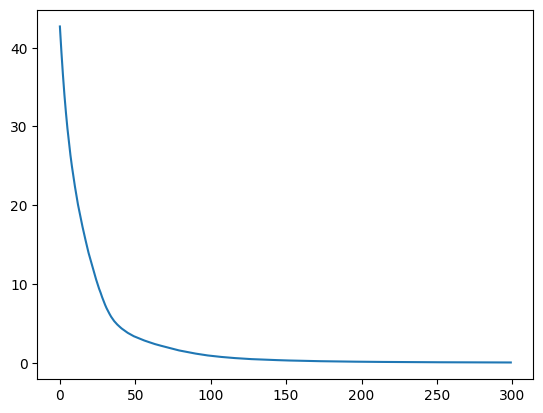

4/4 [==============================] - 0s 1ms/step


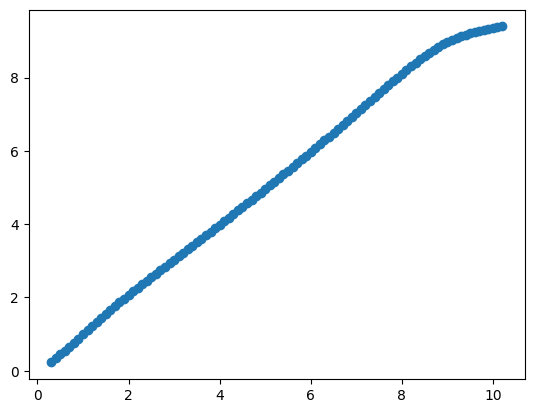

In [6]:
import matplotlib.pyplot as plt

history = model.fit(X, Y, epochs=300)
plt.plot(history.history['loss'])
plt.show()
y_hat = model.predict(X)
plt.scatter(Y, y_hat)
plt.show()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 3, 1)]            0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 256)               66048     
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 66,305
Trainable params: 66,305
Non-trainable params: 0
_________________________________________________________________


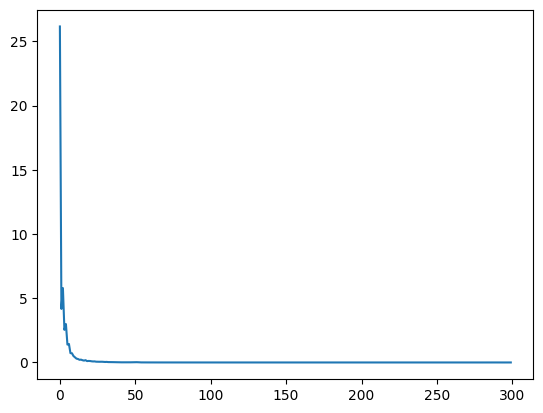

4/4 [==============================] - 0s 1ms/step


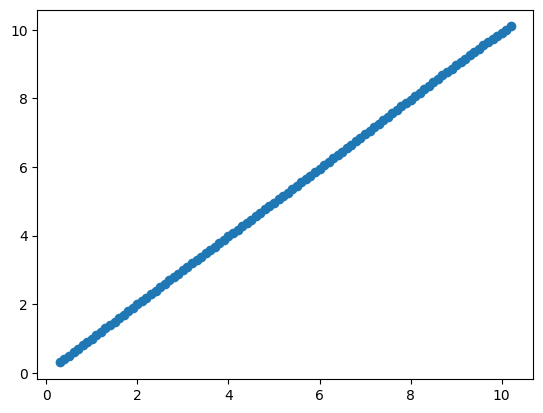

In [7]:
inputs = tf.keras.layers.Input(shape=(seq_len, 1))
x = tf.keras.layers.SimpleRNN(units=256, return_sequences=False)(inputs)
outputs = tf.keras.layers.Dense(1)(x)

model256 = tf.keras.Model(inputs=inputs, outputs=outputs)
model256.compile(optimizer='adam', loss='mse')
model256.summary()

history = model256.fit(X, Y, epochs=300, verbose=0)
plt.plot(history.history['loss'])
plt.show()
y_hat = model256.predict(X)
plt.scatter(Y, y_hat)
plt.show()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 3, 1)]            0         
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 3, 34)             1224      
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 3, 34)             2346      
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, 3, 34)             2346      
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 34)                2346      
                                                                 
 dense_2 (Dense)             (None, 1)                 35        
                                                                 
Total params: 8,297
Trainable params: 8,297
Non-trainable p

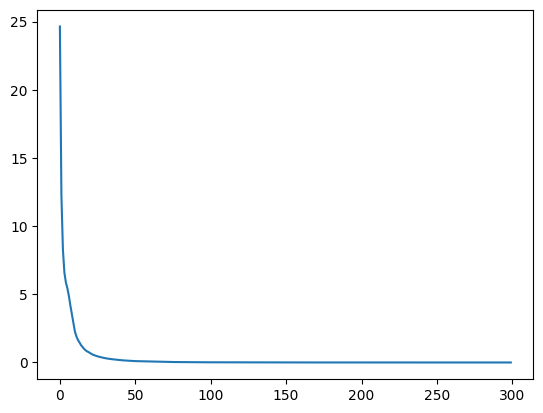

4/4 [==============================] - 0s 2ms/step


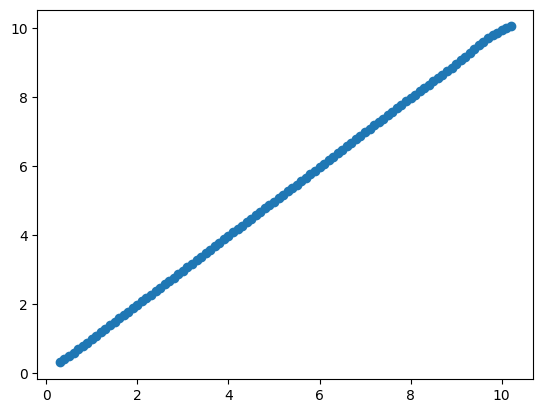

In [8]:
inputs = tf.keras.layers.Input(shape=(seq_len, 1))
x = tf.keras.layers.SimpleRNN(units=34, return_sequences=True)(inputs)
x = tf.keras.layers.SimpleRNN(units=34, return_sequences=True)(x)
x = tf.keras.layers.SimpleRNN(units=34, return_sequences=True)(x)
x = tf.keras.layers.SimpleRNN(units=34, return_sequences=False)(x)
outputs = tf.keras.layers.Dense(1)(x)

model_multi = tf.keras.Model(inputs=inputs, outputs=outputs)
model_multi.compile(optimizer='adam', loss='mse')
model_multi.summary()

history = model_multi.fit(X, Y, epochs=300, verbose=0)
plt.plot(history.history['loss'])
plt.show()
y_hat = model_multi.predict(X)
plt.scatter(Y, y_hat)
plt.show()

# LSTM
- 장기 의존성 문제를 해결
- C , 셀 상태를 더해서 넘겨줌(기억)
- 망각 게이트 -> 입력 게이트 -> 출력 게이트